<a href="https://colab.research.google.com/github/AndrySone/Lab_MMO/blob/main/Lab_2.1/%D0%98%D0%90%D0%94%D0%B8%D0%9C%D0%9E_%D0%9B%D0%B0%D0%B1_2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pit
%matplotlib inline

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [24]:
data = pd.read_csv('/content/drive/MyDrive/ИАДиМО/Part_2/Lab_1/Data_lab2_1.csv')

In [25]:
data.head()

,day,weather,temp,humdity,wind,play
0,1,1,2,1,0,0
1,2,2,2,1,0,1
2,3,1,1,0,1,1
3,4,2,1,1,1,1
4,5,3,0,1,1,0


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   day      20 non-null     int64
 1   weather  20 non-null     int64
 2   temp     20 non-null     int64
 3   humdity  20 non-null     int64
 4   wind     20 non-null     int64
 5   play     20 non-null     int64
dtypes: int64(6)
memory usage: 1.1 KB


In [41]:
X,y = data.drop('play', axis=1), data['play']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 20, stratify= y)

In [29]:
tree = DecisionTreeClassifier(random_state = 20)

In [30]:
scaler = StandardScaler()

In [31]:
steps = [('scaler', scaler),
('tree', tree)]
pipeline = Pipeline(steps)

In [33]:
(X_train.shape, y_train.shape)

((16, 5), (4, 5))

In [45]:
pipeline.fit(X_train, y_train)
prediction = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, prediction)
print("Accuracy: accuracy")

Accuracy: accuracy


In [46]:
cv = StratifiedKFold(n_splits= 5, random_state= 20, shuffle= True)

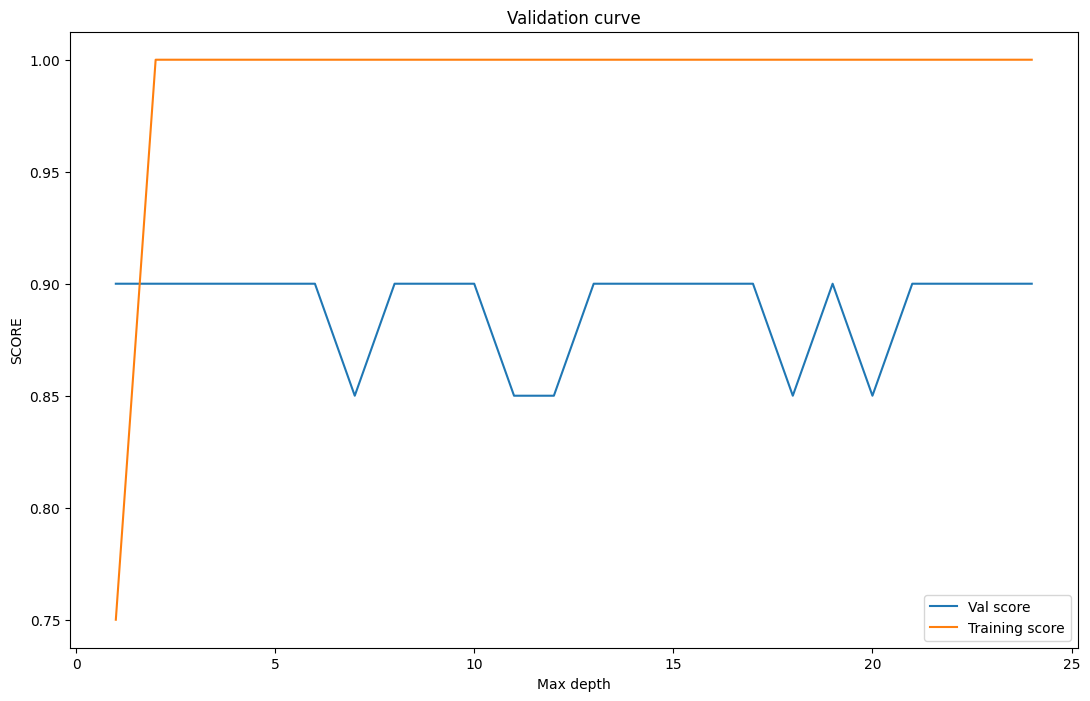

Best score is 0.9 with Max depth = 1


In [48]:
max_depths = np.arange(1, 25)
train_scores = []
val_scores = []
for param_val in max_depths:
    tree = DecisionTreeClassifier(max_depth = param_val)
    scaler = StandardScaler()
    steps = [('scaler', scaler), ('tree', tree)]
    pipeline = Pipeline(steps)
    pipeline.fit(X, y)
    prediction = pipeline.predict(X_test)
    accuracy = accuracy_score(y_test, prediction)
    train_scores.append(accuracy)
    cv_result = cross_val_score(pipeline, X_train, y_train, cv=cv, scoring = 'roc_auc')
    val_scores.append(cv_result.mean())

pit.figure(figsize=[13,8])
pit.plot(max_depths, val_scores, label = 'Val score')
pit.plot(max_depths, train_scores, label = 'Training score')
pit.legend()
pit.title('Validation curve')
pit.xlabel('Max depth')
pit.ylabel('SCORE')
pit.show()
print("Best score is {} with Max depth = {}".format(np.max(val_scores), max_depths[np.argmax(val_scores)]))

In [52]:
logreg = LogisticRegression(solver='liblinear')
steps = [('scaler', scaler), ('LR', logreg)]
pipeline = Pipeline(steps)

param_grid = {'LR__C': np.logspace(-3, 3, 7), 'LR__penalty': ['l1', 'l2']}

tree_cv = GridSearchCV(pipeline, param_grid, cv=cv, scoring = 'roc_auc')
tree_cv.fit(X_train, y_train)

print("Tuned hyperparameters : {}".format(tree_cv.best_params_))
print("Best cv score: {}".format(tree_cv.best_score_))

Tuned hyperparameters : {'LR__C': 0.001, 'LR__penalty': 'l2'}
Best cv score: 0.9
